In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Dropout, Lambda, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt

In [3]:
chemicas = ['C','Si','Mn','Cr','Ni','Mo','Ti','Cu','Al','V','Nb','Co','W','Fe','Zr','Be','Sb','Mg','Zn','S','P','Pb','Sn','Cd','Ca','Bi','Ag','Ga','Sc','Au','Tl','Nd','La','Y','Gd','Ge','Ta','Ce','B','Hf']

In [4]:
data = pd.read_csv("final_dataset.csv")

In [5]:
X = data.drop(columns=(chemicas+['Sample', 'Device', 'Material', 'Temperature'])).values
y = data[chemicas].values

scaler_X = StandardScaler()
scaler_y = MinMaxScaler() #feature_range=(0.01, 0.99))
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# np.savetxt("/tmp/check.txt", y, fmt='%.6f')
# print(y_scaled)

In [9]:
num_chemicas = len(chemicas)

inputs = Input(shape=(X.shape[1],))
x = Dense(512, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(num_chemicas, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [10]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test),
          epochs=100,
          batch_size=32)

Epoch 1/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0395 - mae: 0.0919 - val_loss: 0.0067 - val_mae: 0.0180
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0058 - mae: 0.0186 - val_loss: 0.0041 - val_mae: 0.0138
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040 - mae: 0.0148 - val_loss: 0.0036 - val_mae: 0.0125
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - mae: 0.0133 - val_loss: 0.0034 - val_mae: 0.0116
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - mae: 0.0126 - val_loss: 0.0032 - val_mae: 0.0110
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031 - mae: 0.0119 - val_loss: 0.0028 - val_mae: 0.0104
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - mae: 0.0113 - val_loss: 0.0027 - val_mae: 0.0098
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 - mae: 0.0109 - val_loss: 0.0027 - val_mae: 0.0097
Epoch 9/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

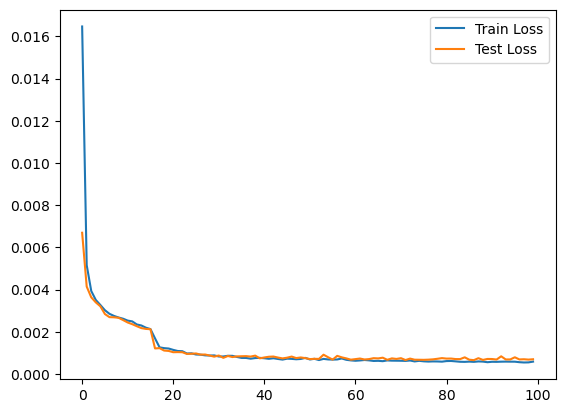

In [11]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

In [12]:
arr_num = 10
question = X_scaled[arr_num].reshape((1,256))
y_true = y_scaled[arr_num]
y_pred = model.predict(question)[0]
print(np.around(y_pred,2))
print(np.around(y_true,2))
print(np.around(y_pred - y_true, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.84 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[0.   0.   0.   0.   0.   0.   0.   0.04 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.73 0.   0.   0.   0.23 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
[ 0.    0.    0.    0.    0.    0.    0.   -0.04 -0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.11  0.    0.    0.   -0.23  0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.  ]
